In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mcolors
from datetime import datetime
import numpy as np

%matplotlib inline

In [2]:
#Leitura e conversão de tempo do dataframe de controle
data = pd.read_csv('https://raw.githubusercontent.com/Moises788/PIBIC-UFRN-IC---DATA/main/Dados%20Certos/DoisLinks/Rodada33/dados.csv')
data['Date'] = pd.to_datetime(data['Date'])

#Leitura e conversão de t empo do dataframe de rede
rede = pd.read_csv('https://raw.githubusercontent.com/Moises788/PIBIC-UFRN-IC---DATA/main/Dados%20Certos/DoisLinks/Rodada33/pwlogger.csv')
rede['Date'] = pd.to_datetime(rede['Date'])

device01 = rede
device05 = rede

indexNames01 = device01[ device01['Devices'] == 'TT-IS-05' ].index
indexNames05 = device05[ device05['Devices'] == 'LD-IS-01' ].index

device01 = device01.drop(indexNames01)
device05 = device05.drop(indexNames05)

#device05 =device05.drop('Date', axis=1)

rede = pd.merge(device01, device05, how='left', on='Date')

rede = rede.set_index('Date')
data = data.set_index('Date')
df = data.merge(rede, right_index = True,left_index = True, how = 'outer')

#Leitura e conversão de tempo do dataframe de controle
data = pd.read_csv('https://raw.githubusercontent.com/Moises788/PIBIC-UFRN-IC---DATA/main/Dados%20Certos/DoisLinks/Rodada33/dados.csv')
data['Date'] = pd.to_datetime(data['Date'])

#Leitura e conversão de t empo do dataframe de rede
rede = pd.merge(device01, device05, how='left', on='Date')

In [3]:
rodada = 0
indicie_rede = 0
completo = pd.DataFrame()
for indicie, linha in df.iterrows():
    if np.isnan(linha['LV1']):
        #print('nulo')
        indicie_rede += 1
        if rodada == 0:  
            indicie_rede = 0
            rodada = 1  
        
    else:
        completo = completo.append(rede.loc[indicie_rede], ignore_index= True)
        #print(indicie_rede)
   
completo = completo.drop('Date', axis=1)

df = data.merge(completo, left_index=True, right_index=True, how = 'outer')
#df.to_csv('DadosCompletos.csv')
df

,LV1,SPVolt,Mode,Kp,Ki,Kd,Output,Date,Devices_x,Neighbors_x,...,Devices_y,Neighbors_y,Clock Source_y,Link Status_y,DPDU Tx_y,DPDU Tx Fail_y,DPDU Rx_y,DPDU Rx Fail_y,RSSI_y,Quality_y
0,101.60,100.0,1,0.005,0.0004,0.0005,567,2022-06-13 11:19:40.630164,LD-IS-01,TT-IS-05,...,TT-IS-05,BB-IS-01,Primary Clock Source,available,1702.0,38.0,787.0,0.0,-56.0,Good Signal(189)
1,101.70,100.0,1,0.005,0.0004,0.0005,567,2022-06-13 11:19:41.630221,LD-IS-01,TT-IS-05,...,TT-IS-05,BB-IS-01,Primary Clock Source,available,1702.0,38.0,787.0,0.0,-56.0,Good Signal(189)
2,101.73,100.0,1,0.005,0.0004,0.0005,570,2022-06-13 11:19:42.630278,LD-IS-01,TT-IS-05,...,TT-IS-05,BB-IS-01,Primary Clock Source,available,1702.0,38.0,787.0,0.0,-56.0,Good Signal(189)
3,101.84,100.0,1,0.005,0.0004,0.0005,570,2022-06-13 11:19:43.632336,LD-IS-01,TT-IS-05,...,TT-IS-05,BB-IS-01,Primary Clock Source,available,1702.0,38.0,787.0,0.0,-56.0,Good Signal(189)
4,101.85,100.0,1,0.005,0.0004,0.0005,570,2022-06-13 11:19:44.431381,LD-IS-01,TT-IS-05,...,TT-IS-05,BB-IS-01,Primary Clock Source,available,1702.0,38.0,787.0,0.0,-56.0,Good Signal(189)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,100.84,100.0,1,0.005,0.0004,0.0005,570,2022-06-13 12:02:41.184763,LD-IS-01,TT-IS-05,...,TT-IS-05,BB-IS-01,Primary Clock Source,available,6122.0,5257.0,3362.0,0.0,-51.0,Excellent Signal(204)
2578,100.84,100.0,1,0.005,0.0004,0.0005,570,2022-06-13 12:02:42.188821,LD-IS-01,TT-IS-05,...,TT-IS-05,BB-IS-01,Primary Clock Source,available,6122.0,5257.0,3362.0,0.0,-51.0,Excellent Signal(204)
2579,100.80,100.0,1,0.005,0.0004,0.0005,570,2022-06-13 12:02:43.388889,LD-IS-01,TT-IS-05,...,TT-IS-05,BB-IS-01,Primary Clock Source,available,6122.0,5257.0,3362.0,0.0,-51.0,Excellent Signal(204)
2580,100.74,100.0,1,0.005,0.0004,0.0005,570,2022-06-13 12:02:44.385946,LD-IS-01,TT-IS-05,...,TT-IS-05,BB-IS-01,Primary Clock Source,available,6122.0,5257.0,3362.0,0.0,-51.0,Excellent Signal(204)


Plot de Gráfico

In [4]:
tempo = df["Date"]
Nivel_tank = df["LV1"]
Saida = df["Output"]
Setpoint = df["SPVolt"]

tempo_rede = tempo
DPDU_Tx01 = df['DPDU Tx_x']
DPDU_Tx_Fail01 = df['DPDU Tx Fail_x']
RSSI_rede01 = df['RSSI_x']

DPDU_Tx05 = df['DPDU Tx_y']
DPDU_Tx_Fail05 = df['DPDU Tx Fail_y']
RSSI_rede05 = df['RSSI_y']



In [5]:
df2 =pd.DataFrame({"pacotes enviados 01":DPDU_Tx01,
                   "pacotes perdidos 01":DPDU_Tx_Fail01})

df3 = pd.DataFrame({ "pacotes enviados 05":DPDU_Tx05,
                   "pacotes perdidos 05":DPDU_Tx_Fail05})

Código abaixo responsável por realizar o cálculo de perda real de pacote

In [6]:
rodada = True
delta_df = pd.DataFrame()
perdaPacote = pd.DataFrame()
for indicie, linha in df.iterrows():
    if indicie+1 < len(df2):
        if (df2['pacotes enviados 01'].iloc[indicie] == df2['pacotes enviados 01'].iloc[indicie+1]) and rodada:
            delta_df = df2.loc[indicie] - df2.loc[indicie]
        elif df2['pacotes enviados 01'].iloc[indicie] != df2['pacotes enviados 01'].iloc[indicie+1]:
            delta_df = df2.iloc[indicie+1] - df2.iloc[indicie]
            rodada = False
            #perdaPacote = perdaPacote.append(df2.loc[indicie], ignore_index= True)
        elif (df2['pacotes enviados 01'].iloc[indicie] == df2['pacotes enviados 01'].iloc[indicie+1]) and not(rodada):
            delta_df
        
        perdaPacote = perdaPacote.append(delta_df, ignore_index= True)

perdaPacote = perdaPacote.append(delta_df, ignore_index= True)
DPDU_Tx_Fail01 = perdaPacote["pacotes perdidos 01"]
DPDU_Tx01 = perdaPacote["pacotes enviados 01"]               


In [7]:
rodada = True
delta_df = pd.DataFrame()
perdaPacote = pd.DataFrame()
for indicie, linha in df.iterrows():
    if indicie+1 < len(df3):
        if (df3['pacotes enviados 05'].iloc[indicie] == df3['pacotes enviados 05'].iloc[indicie+1]) and rodada:
            delta_df = df3.loc[indicie] - df3.loc[indicie]
        elif df3['pacotes enviados 05'].iloc[indicie] != df3['pacotes enviados 05'].iloc[indicie+1]:
            delta_df = df3.iloc[indicie+1] - df3.iloc[indicie]
            rodada = False
        elif (df3['pacotes enviados 05'].iloc[indicie] == df3['pacotes enviados 05'].iloc[indicie+1]) and not(rodada):
            delta_df
        
        perdaPacote = perdaPacote.append(delta_df, ignore_index= True)

perdaPacote = perdaPacote.append(delta_df, ignore_index= True)       
DPDU_Tx_Fail05 = perdaPacote["pacotes perdidos 05"]
DPDU_Tx05 = perdaPacote["pacotes enviados 05"]  



In [8]:
erro = (abs(Nivel_tank-Setpoint)/Setpoint)*100
DPDU_Total01 = DPDU_Tx01 + DPDU_Tx_Fail01
DPDU_Total05 = DPDU_Tx05 + DPDU_Tx_Fail05
PDRI01 = (DPDU_Tx01/DPDU_Total01) * 100
PDRI05 = (DPDU_Tx05/DPDU_Total05) * 100
Saida = Saida*(3.3/1024)

DPDU_Tx05.sample(15)

2339     79.0
1297    136.0
2047    138.0
710     136.0
1992    138.0
702     136.0
2348     79.0
35      126.0
1724     92.0
1146    138.0
10      126.0
729     136.0
1419    138.0
974     138.0
1714     92.0
Name: pacotes enviados 05, dtype: float64

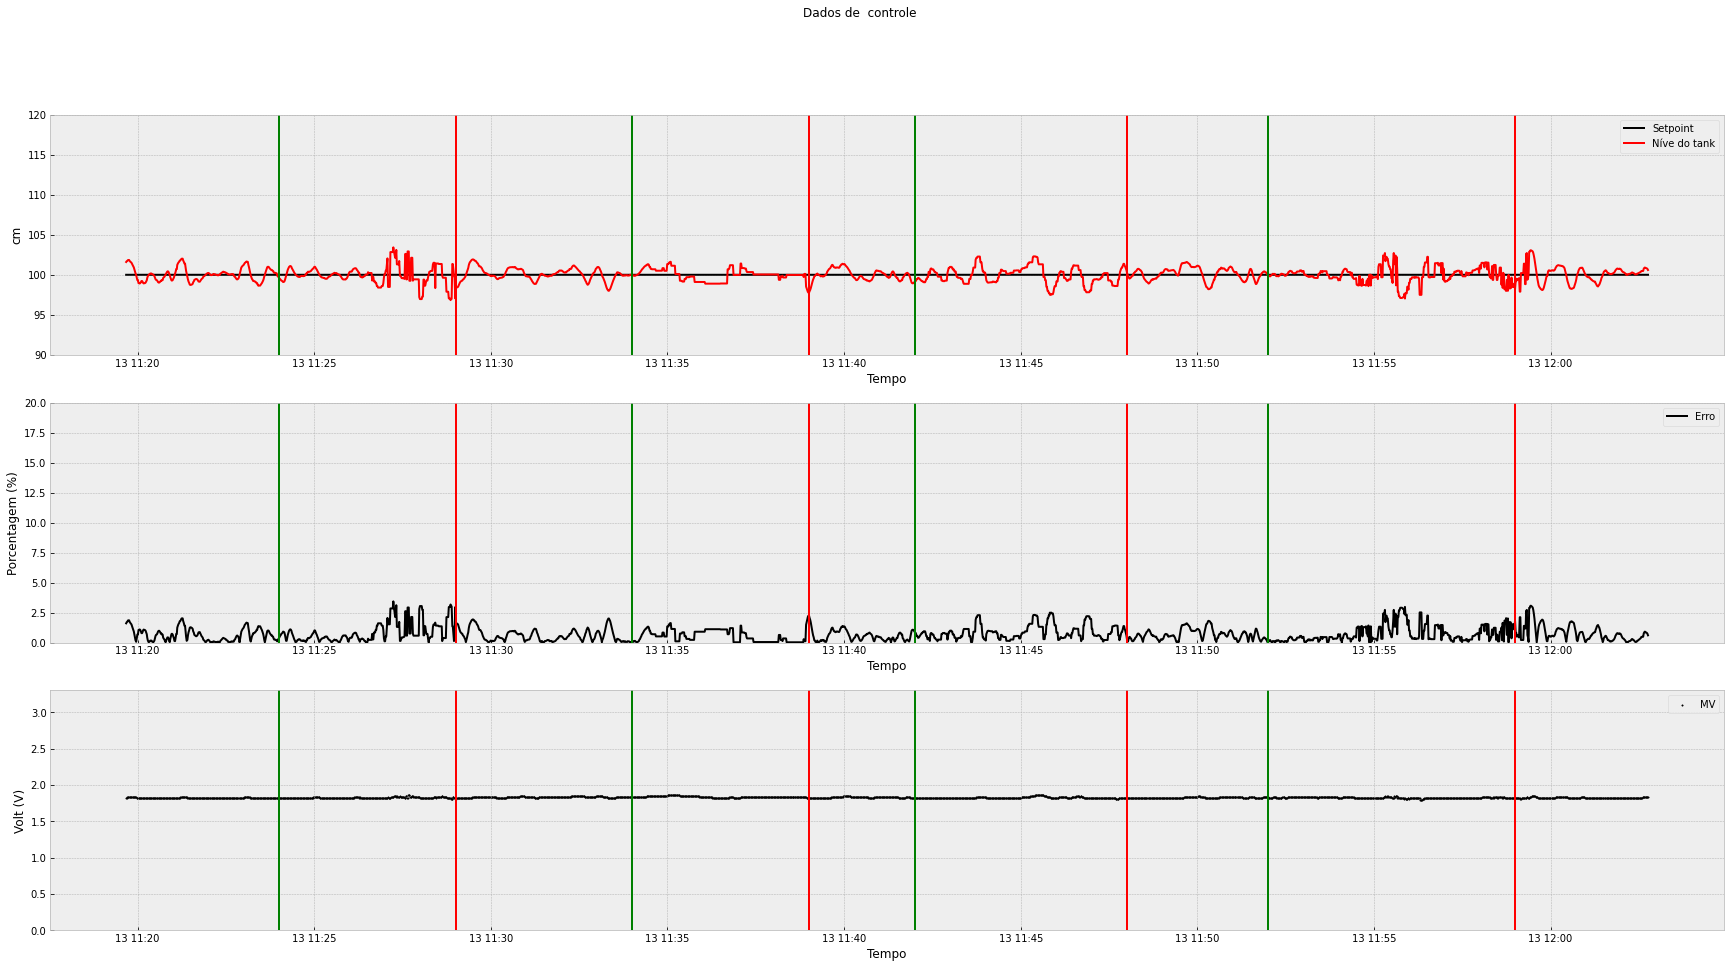

In [9]:
plt.style.use('bmh')

fig = plt.figure(figsize=(30,15))
fig.suptitle('Dados de  controle')

fig.add_subplot(311)
plt.plot(tempo, Setpoint, label = 'Setpoint', color = 'black')
plt.plot(tempo, Nivel_tank, label = 'Níve do tank', color = 'red')
plt.legend() #legenda do gráfico
plt.xlabel('Tempo')
plt.ylabel('cm')
plt.ylim(ymin = 90, ymax= 120)
plt.grid(True)

plt.axvline(pd.Timestamp("2022-06-13 11:24:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:29:00"), color = 'r')

plt.axvline(pd.Timestamp("2022-06-13 11:34:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:39:00"), color = 'r')

plt.axvline(pd.Timestamp("2022-06-13 11:42:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:48:00"), color = 'r')

plt.axvline(pd.Timestamp("2022-06-13 11:52:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:59:00"), color = 'r')

fig.add_subplot(312)
plt.plot(tempo, erro, label = 'Erro', color = 'black')
plt.ylim(ymin = 0, ymax= 20)
plt.legend() #legenda do gráfico
plt.xlabel('Tempo')
plt.ylabel('Porcentagem (%)')

plt.axvline(pd.Timestamp("2022-06-13 11:24:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:29:00"), color = 'r')

plt.axvline(pd.Timestamp("2022-06-13 11:34:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:39:00"), color = 'r')

plt.axvline(pd.Timestamp("2022-06-13 11:42:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:48:00"), color = 'r')

plt.axvline(pd.Timestamp("2022-06-13 11:52:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:59:00"), color = 'r')

fig.add_subplot(313)
plt.scatter(tempo, Saida, label = 'MV', s= 2, color = 'black')
plt.ylim(ymin = 0, ymax= 3.3)
plt.legend() #legenda do gráfico
plt.xlabel('Tempo')
plt.ylabel('Volt (V)')

plt.axvline(pd.Timestamp("2022-06-13 11:24:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:29:00"), color = 'r')

plt.axvline(pd.Timestamp("2022-06-13 11:34:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:39:00"), color = 'r')

plt.axvline(pd.Timestamp("2022-06-13 11:42:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:48:00"), color = 'r')

plt.axvline(pd.Timestamp("2022-06-13 11:52:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:59:00"), color = 'r')
figcontrole = plt.gcf()
## vermelho começa e verde termina
plt.show()

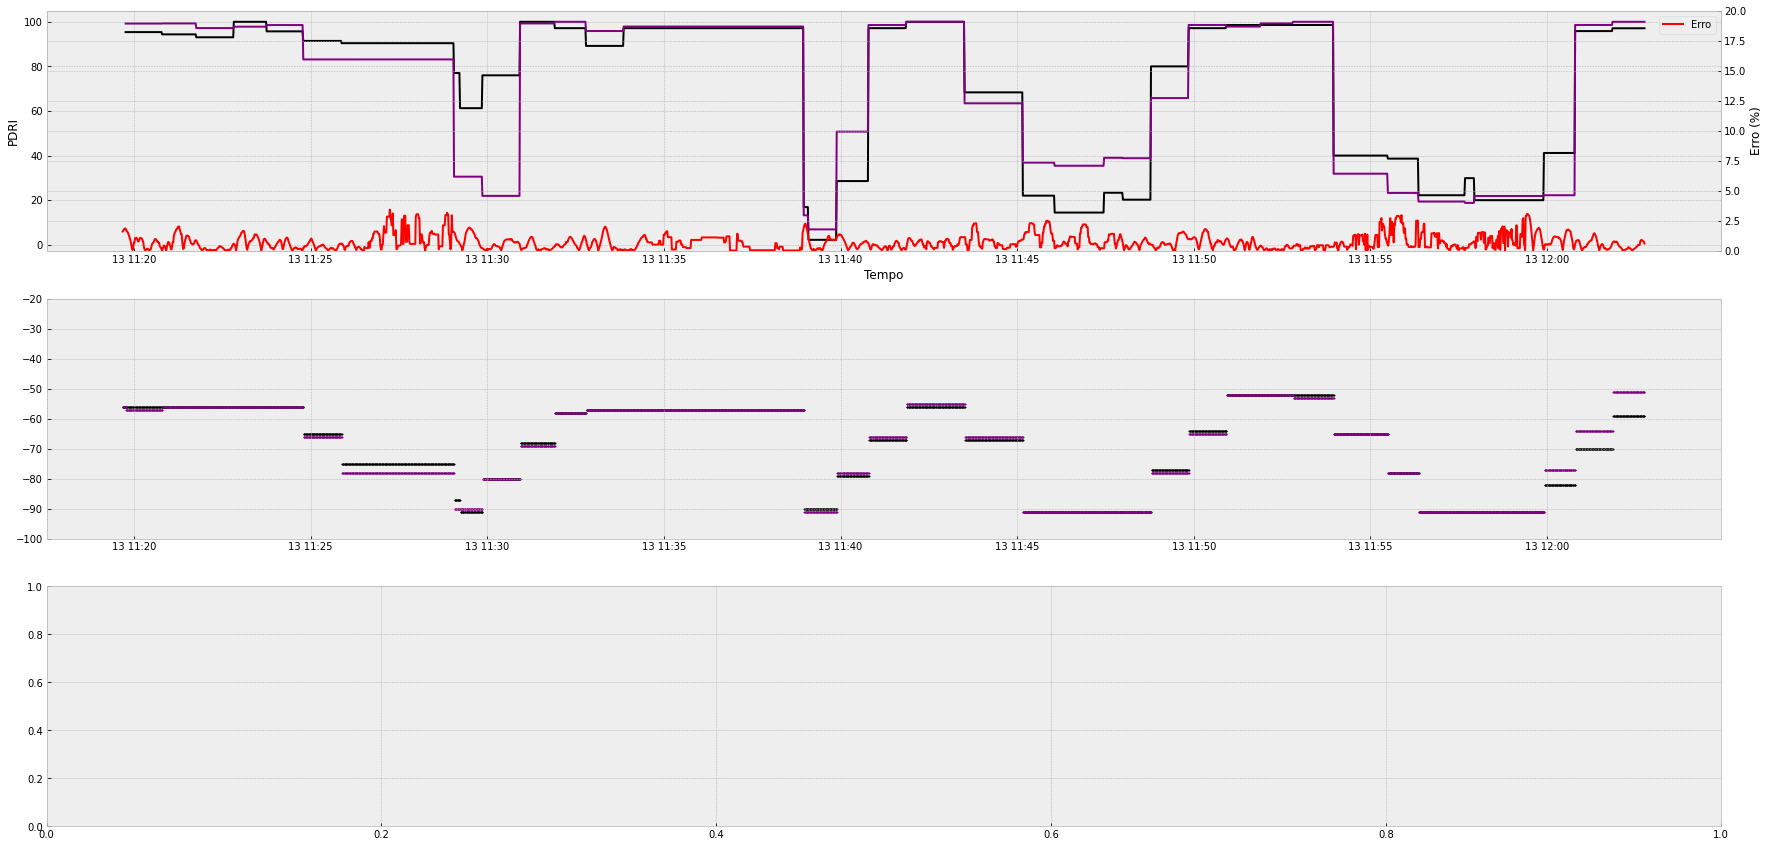

In [10]:
fig, ax= plt.subplots(nrows=3, ncols=1, figsize=(30,15))

ax[0].plot(tempo_rede, PDRI01, label = 'link 1', color = 'black')
ax[0].plot(tempo_rede, PDRI05, label = 'link 2', color = 'purple')
ax[0].set_xlabel('Tempo')
ax[0].set_ylabel('PDRI')

aux = ax[0].twinx() #método para criar dois eixos y
aux.plot(tempo, erro, label = 'Erro', color = 'red')
aux.set_ylabel('Erro (%)')
aux.set_ylim(0, 20)

ax[1].scatter(tempo_rede, RSSI_rede01, label = 'RSSI_01', s= 2, color = 'black')
ax[1].scatter(tempo_rede, RSSI_rede05, label = 'RSSI_05', s= 2, color = 'purple')
ax[1].set_ylim(ymin = -100, ymax= -20)

plt.legend()
figrede = plt.gcf() 
plt.show()

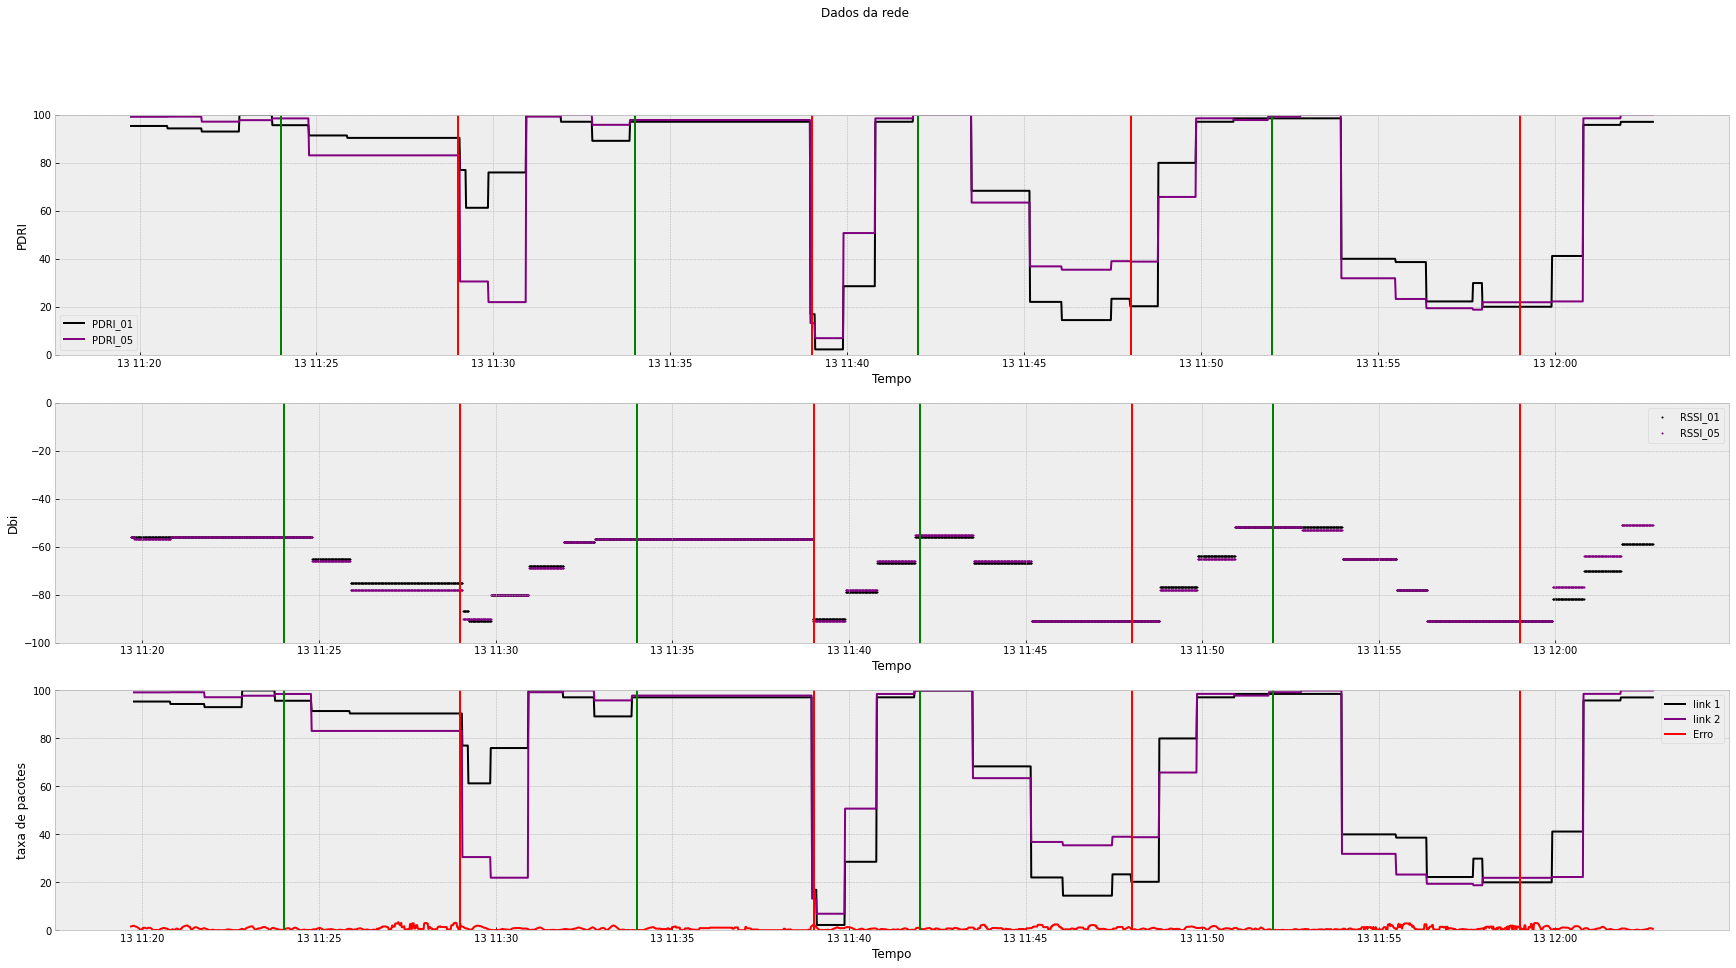

In [11]:
fig = plt.figure(figsize=(30,15))
fig.suptitle('Dados da rede')

fig.add_subplot(311)
plt.plot(tempo_rede, PDRI01, label = 'PDRI_01', color = 'black')
plt.plot(tempo_rede, PDRI05, label = 'PDRI_05', color = 'purple')
plt.ylim(ymin = 0, ymax= 100)
plt.legend() #legenda do gráfico
plt.xlabel('Tempo')
plt.ylabel('PDRI')

plt.axvline(pd.Timestamp("2022-06-13 11:24:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:29:00"), color = 'r')

plt.axvline(pd.Timestamp("2022-06-13 11:34:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:39:00"), color = 'r')

plt.axvline(pd.Timestamp("2022-06-13 11:42:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:48:00"), color = 'r')

plt.axvline(pd.Timestamp("2022-06-13 11:52:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:59:00"), color = 'r')

fig.add_subplot(312)
plt.scatter(tempo_rede, RSSI_rede01, label = 'RSSI_01', s= 2, color = 'black')
plt.scatter(tempo_rede, RSSI_rede05, label = 'RSSI_05', s= 2, color = 'purple')
plt.ylim(ymin = -100, ymax= 0)
plt.legend() #legenda do gráfico
plt.xlabel('Tempo')
plt.ylabel('Dbi')

plt.axvline(pd.Timestamp("2022-06-13 11:24:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:29:00"), color = 'r')

plt.axvline(pd.Timestamp("2022-06-13 11:34:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:39:00"), color = 'r')

plt.axvline(pd.Timestamp("2022-06-13 11:42:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:48:00"), color = 'r')

plt.axvline(pd.Timestamp("2022-06-13 11:52:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:59:00"), color = 'r')

fig.add_subplot(313)
plt.plot(tempo_rede, PDRI01, label = 'link 1', color = 'black')
plt.plot(tempo_rede, PDRI05, label = 'link 2', color = 'purple')
plt.plot(tempo, erro, label = 'Erro', color = 'red')
plt.ylim(ymin = 0, ymax= 100)
plt.legend() #legenda do gráfico
plt.xlabel('Tempo')
plt.ylabel('taxa de pacotes')

plt.axvline(pd.Timestamp("2022-06-13 11:24:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:29:00"), color = 'r')

plt.axvline(pd.Timestamp("2022-06-13 11:34:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:39:00"), color = 'r')

plt.axvline(pd.Timestamp("2022-06-13 11:42:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:48:00"), color = 'r')

plt.axvline(pd.Timestamp("2022-06-13 11:52:00"), color = 'g')
plt.axvline(pd.Timestamp("2022-06-13 11:59:00"), color = 'r')

figrede01 = plt.gcf() 
plt.show()



Salvando gráficos

In [12]:
figrede01.savefig('dados da rede.pdf', format='pdf')
figcontrole.savefig('dados de controle.pdf', format='pdf')
figrede.savefig('dadoesRede.pdf', format='pdf')